## Popularity Calculation

In [3]:
import nltk
from nltk import ngrams, FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, webtext
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby
from collections import Counter

In [4]:
stop = stopwords.words('english')
stop.extend(['thing','anything','much','something','my','we','lot','day','get','dealer','way','would','like','car','cars','said'])
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/subhayuchakravarty/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
df = pd.read_csv('posts.csv')
df.shape

(5164, 4)

In [6]:
df['comments'] = df['comments'].astype(str)
mask = [isinstance(item, (str)) for item in df['comments']]
df = df.loc[mask]
df['allcomments'] = df['comments']

In [10]:
carmodels=pd.read_csv('models-edit.csv', header=None)

In [11]:
# For replacing car models with brand names
brand_replace={'acura':['acura'],'audi':['audi'],'bmw':['bmw'],'buick':['buick'],'cadillac':['cadillac'],'chevrolet':['chevrolet'],'chrysler':['chrysler'],'dodge':['dodge'],'ford':['ford'],'honda':['honda'],'hyundai':['hyundai'],'infiniti':['infiniti'],'kia':['kia'],'lincoln':['lincoln'],'mazda':['mazda'],'mercedes':['mercedes'],'nissan':['nissan'],'subaru':['subaru'],'pontiac':['pontiac'],'suzuki':['suzuki'],'toyota':['toyota'],'volkswagen':['volkswagen'],'volvo':['volvo'],'car':[]}
for x in carmodels.values:
    if(x[0] in brand_replace.keys()):
        brand_replace[x[0]].append(x[1])
        

In [12]:
brand_replace['audi']

['audi',
 'quattro',
 'a4',
 'a6',
 'a5',
 'a7',
 'q3',
 'q5',
 'q7',
 'a8',
 's4',
 'a3',
 'audis',
 'audi0']

In [13]:
# Synonymous words for replacement
performwords=['powerful','power','mileage','speed','smooth']
stylewords=['look','looks','stylish','gorgeous','classy']
luxurywords=['comfort','convenience','high-end','luxurious','expensive','fancy','grand']
costwords=['costs','cheap','prices','pricing','economic']
bigwords=['big','spacious','space','room','huge','leg-space','bigger']
influencewords=['wife','family','relative','relatives','cousin']

In [14]:
def replaceBrand(row):
    for k,values in brand_replace.items():
        for v in values:
            if row is not None:
                lrow=row.lower()
                if v in lrow:
                    return lrow.replace(v,k.upper())
                else:
                    lrow=row
    return lrow

In [15]:
# Replacements
for com in df['comments']:
    for word in stop:
        t = com.lower()
        com = t.replace(word,'')
        

In [16]:
df['comments'] = df['comments'].apply(replaceBrand)

for luxury in luxurywords:
    df['comments'] = df['comments'].str.replace(luxury, 'luxury')
for performance in performwords:
    df['comments'] = df['comments'].str.replace(performance, "performance")
for style in stylewords:
    df['comments'] = df['comments'].str.replace(style, "style")
for cost in costwords:
    df['comments'] = df['comments'].str.replace(cost, "price")
for big in bigwords:
    df['comments'] = df['comments'].str.replace(big, "space")
for influence in influencewords:
    df['comments'] = df['comments'].str.replace(influence, "influencer")

In [17]:
def removeStop(wordsList):
    return [i for i in wordsList if i not in stop]

In [18]:
tokenizer=RegexpTokenizer(r'\w+')
tagList=[]
for com in df['comments']:
    wordsList = tokenizer.tokenize(com)
    wordsList = removeStop(wordsList)
    tagged = nltk.pos_tag(wordsList) 
    tagList.append(tagged)
#     tagList.append(wordsList)
print(tagList[0])

[('nissanion', 'NN'), ('still', 'RB'), ('AUDI', 'NNP'), ('4', 'CD'), ('though', 'IN'), ('AUDI', 'NNP'), ('need', 'VBP'), ('schedule', 'JJ'), ('return', 'NN'), ('miles', 'NNS'), ('promised', 'VBD'), ('drive', 'NN'), ('least', 'NN'), ('twice', 'JJ'), ('week', 'NN'), ('work', 'NN'), ('tomorrow', 'NN'), ('thurs', 'VBZ'), ('probably', 'RB'), ('return', 'JJ'), ('weekend', 'NN'), ('due', 'JJ'), ('date', 'NN'), ('sept', 'VBD'), ('3rd', 'CD')]


In [19]:
# Flattening into a bag of words
wordSoup = [y for x in tagList for y in x]

In [113]:
# Getting most common Proper nouns and common/abstract nouns
nounList = [word for word in wordSoup if word[1]=='NNP']
adjectiveList = [word for word in wordSoup if (word[1]=='NN')]

nouncountList = Counter(nounList)
nouncountList.most_common(20)


[(('AUDI', 'NNP'), 1163),
 (('BMW', 'NNP'), 943),
 (('ACURA', 'NNP'), 814),
 (('CAR', 'NNP'), 174),
 (('CADILLAC', 'NNP'), 110),
 (('HONDA', 'NNP'), 98),
 (('FORD', 'NNP'), 83),
 (('HYUNDAI', 'NNP'), 75),
 (('BMWs', 'NNP'), 64),
 (('VOLKSWAGEN', 'NNP'), 63),
 (('AUDIs', 'NNP'), 60),
 (('AUDI0', 'NNP'), 46),
 (('CHEVROLET', 'NNP'), 43),
 (('TOYOTA', 'NNP'), 43),
 (('x', 'NNP'), 42),
 (('ACURAs', 'NNP'), 38),
 (('DODGE', 'NNP'), 38),
 (('My', 'NNP'), 37),
 (('MERCEDES', 'NNP'), 36),
 (('AWD', 'NNP'), 35)]

In [233]:
adjcountList = Counter(adjectiveList)
adjcountList.most_common(25)

[(('performance', 'NN'), 1547),
 (('price', 'NN'), 1070),
 (('time', 'NN'), 885),
 (('luxury', 'NN'), 758),
 (('drive', 'NN'), 587),
 (('space', 'NN'), 545),
 (('year', 'NN'), 478),
 (('series', 'NN'), 474),
 (('bmw', 'NN'), 473),
 (('sport', 'NN'), 466),
 (('engine', 'NN'), 462),
 (('style', 'NN'), 438),
 (('model', 'NN'), 413),
 (('money', 'NN'), 400),
 (('class', 'NN'), 356),
 (('influencer', 'NN'), 335),
 (('course', 'NN'), 334),
 (('s4', 'NN'), 332),
 (('market', 'NN'), 327),
 (('brand', 'NN'), 325),
 (('point', 'NN'), 323),
 (('cost', 'NN'), 322),
 (('tlx', 'NN'), 315),
 (('today', 'NN'), 295),
 (('test', 'NN'), 289)]

In [234]:
brandList = ['ACURA','AUDI','BMW','CADILLAC','HONDA']
attributeList = ['luxury','performance','style','price','space']

In [235]:
comb_count=[]
car_count={}
attrib_count={}
for car in brandList:
    num_car=0
    for comment in df.comments:
            if car in comment:
                num_car+=1
    car_count[car]=num_car
    for attrib in attributeList:
        num_combined=0
        num_attrib=0
        for comment in df.comments:
            if car in comment and attrib in comment:
                num_combined+=1
            if attrib in comment:
                num_attrib+=1
        attrib_count[attrib]=num_attrib
        comb_count.append(((car,attrib),num_combined))

In [236]:
def calculate_lift(car, attrib, combined):
    if(attrib_count[attrib]==0):
        print(attrib)
    if(car_count[car]==0):
        print(car)
    lift = (5164*combined)/(car_count[car]*attrib_count[attrib])
    return lift

In [237]:
lift_scores={}
for k,num in comb_count:
    lift_scores[(k[0],k[1])] = calculate_lift(k[0],k[1], num)
lift_scores

{('ACURA', 'luxury'): 2.0971071761846063,
 ('ACURA', 'performance'): 1.7598579834262653,
 ('ACURA', 'style'): 1.7775839911878097,
 ('ACURA', 'price'): 1.76208610666442,
 ('ACURA', 'space'): 1.9506868131868131,
 ('AUDI', 'luxury'): 1.6323479644925083,
 ('AUDI', 'performance'): 1.6817752408985591,
 ('AUDI', 'style'): 1.6622884757322876,
 ('AUDI', 'price'): 1.537866137235171,
 ('AUDI', 'space'): 1.779756530151564,
 ('BMW', 'luxury'): 1.1256327066306278,
 ('BMW', 'performance'): 1.2594271900654044,
 ('BMW', 'style'): 0.9955790747302571,
 ('BMW', 'price'): 1.2478034701480014,
 ('BMW', 'space'): 0.9118682849184242,
 ('CADILLAC', 'luxury'): 1.7230204575313328,
 ('CADILLAC', 'performance'): 0.5759214855294708,
 ('CADILLAC', 'style'): 1.2480589710280656,
 ('CADILLAC', 'price'): 1.6538660973005948,
 ('CADILLAC', 'space'): 1.167269439421338,
 ('HONDA', 'luxury'): 1.1831502231144375,
 ('HONDA', 'performance'): 0.6026198325407708,
 ('HONDA', 'style'): 0.8570073811819374,
 ('HONDA', 'price'): 0.9888

In [238]:
sorted_lifts = sorted(lift_scores.items(), key=lambda kv: kv[1], reverse=True)
sorted_lifts

[(('ACURA', 'luxury'), 2.0971071761846063),
 (('ACURA', 'space'), 1.9506868131868131),
 (('AUDI', 'space'), 1.779756530151564),
 (('ACURA', 'style'), 1.7775839911878097),
 (('ACURA', 'price'), 1.76208610666442),
 (('ACURA', 'performance'), 1.7598579834262653),
 (('CADILLAC', 'luxury'), 1.7230204575313328),
 (('AUDI', 'performance'), 1.6817752408985591),
 (('AUDI', 'style'), 1.6622884757322876),
 (('CADILLAC', 'price'), 1.6538660973005948),
 (('AUDI', 'luxury'), 1.6323479644925083),
 (('AUDI', 'price'), 1.537866137235171),
 (('BMW', 'performance'), 1.2594271900654044),
 (('CADILLAC', 'style'), 1.2480589710280656),
 (('BMW', 'price'), 1.2478034701480014),
 (('HONDA', 'luxury'), 1.1831502231144375),
 (('CADILLAC', 'space'), 1.167269439421338),
 (('BMW', 'luxury'), 1.1256327066306278),
 (('BMW', 'style'), 0.9955790747302571),
 (('HONDA', 'price'), 0.9888773637596745),
 (('BMW', 'space'), 0.9118682849184242),
 (('HONDA', 'style'), 0.8570073811819374),
 (('HONDA', 'space'), 0.793897824030274

In [239]:
plotarr={}
for b in brandList:
    plotarr[b]=[]
for i in lift_scores:
    plotarr[i[0]].append(lift_scores[i])
plotarr

{'ACURA': [2.0971071761846063,
  1.7598579834262653,
  1.7775839911878097,
  1.76208610666442,
  1.9506868131868131],
 'AUDI': [1.6323479644925083,
  1.6817752408985591,
  1.6622884757322876,
  1.537866137235171,
  1.779756530151564],
 'BMW': [1.1256327066306278,
  1.2594271900654044,
  0.9955790747302571,
  1.2478034701480014,
  0.9118682849184242],
 'CADILLAC': [1.7230204575313328,
  0.5759214855294708,
  1.2480589710280656,
  1.6538660973005948,
  1.167269439421338],
 'HONDA': [1.1831502231144375,
  0.6026198325407708,
  0.8570073811819374,
  0.9888773637596745,
  0.7938978240302743]}

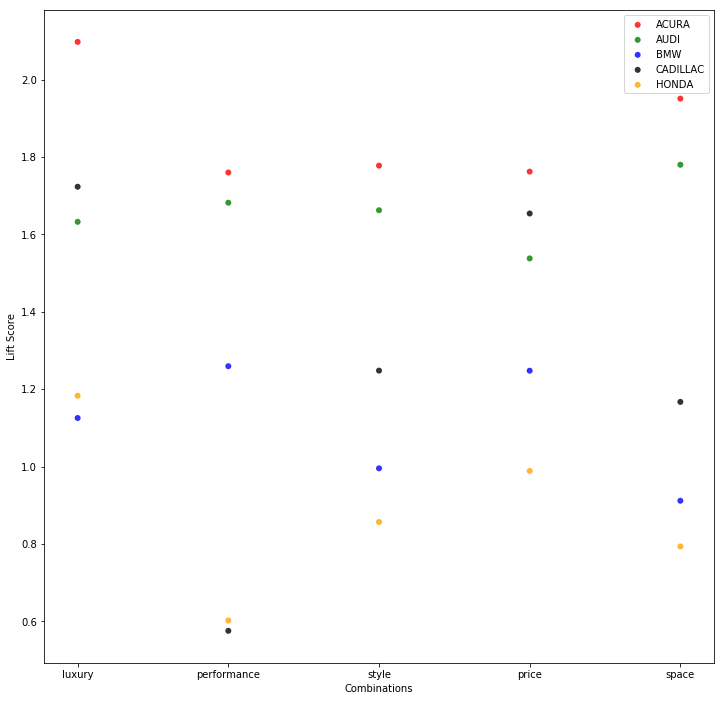

In [240]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
colors = ("red", "green", "blue","black","orange")
groups = plotarr.keys()

for lift, color, group in zip(plotarr, colors, groups):
#     plt.scatter(attributeList,plotarr[lift])
#     ax.scatter(attributeList, plotarr[lift])
    ax.scatter(attributeList, plotarr[lift], alpha=0.8, c=color, edgecolors='none', label=group)

plt.xlabel('Combinations')
plt.ylabel('Lift Score')
plt.legend(loc=1)
plt.show()